## Connecting to MySQL database

In [1]:
## importing pymysql for connecting to mysql database
import pymysql
import pandas as pd

In [2]:
conn = pymysql.connect(host = 'localhost', port = int(3306), user = 'root', passwd = 'Najrul&ansari19', db='Mydatabase')
print("Connection established", conn)

Connection established <pymysql.connections.Connection object at 0x00000217ED79FB80>


In [3]:
data=pd.read_sql_query("SELECT * FROM heart", conn)
data.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_8208\506936787.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query("SELECT * FROM heart", conn)


,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## Making a copy of the dataset
df = data.copy()
df.head()

,ï»¿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA and Data Preprocessing

In [5]:
## Checking for mis-spelled column names
df.columns

Index(['ï»¿age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
## Correcting the age column name 
df = df.rename(columns={'ï»¿age': 'age'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print("The dimension of the DataFrame is,")
df.shape

The dimension of the DataFrame is,


(303, 14)

In [8]:
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64


In [12]:
print("Checking for null values.")
df.isnull().sum()

Checking for null values.


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
# Show only the duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [46]:
### Considering two person may have same data, so this data row is not deleted.

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Data Vizualisation

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

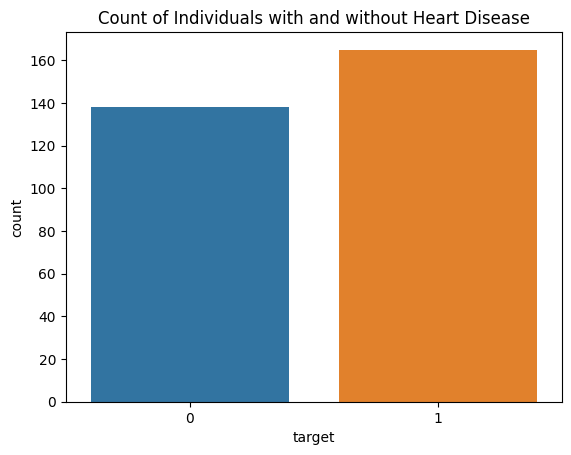

In [53]:
sns.countplot(x='target', data=df)
plt.title('Count of Individuals with and without Heart Disease')
plt.savefig("Count of Individuals with and without Heart Disease.png")
plt.show()

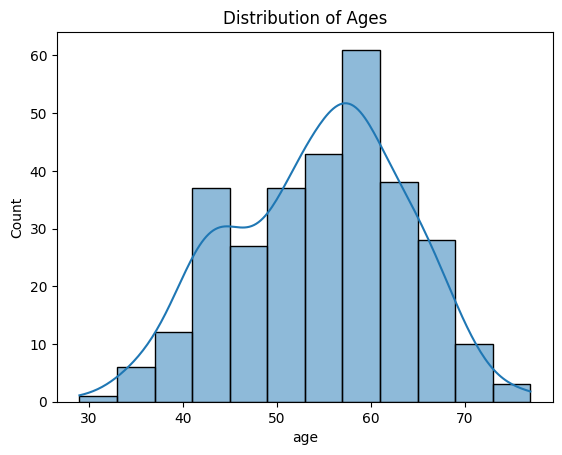

In [54]:
sns.histplot(x='age', data=df, kde=True)
plt.title('Distribution of Ages')
plt.savefig("Distribution of Ages.png")
plt.show()

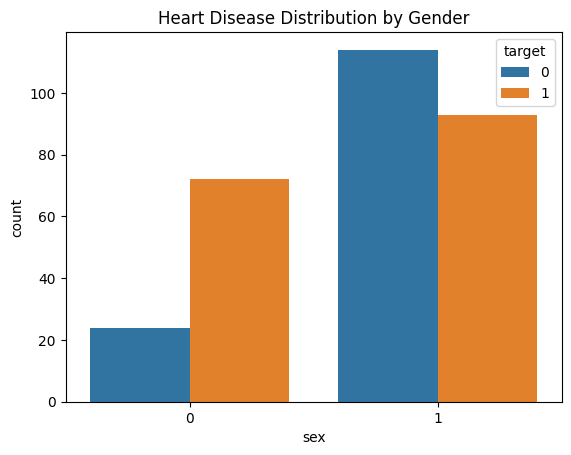

In [55]:
sns.countplot(x='sex', hue='target', data=df)
plt.title('Heart Disease Distribution by Gender')
plt.savefig("Heart Disease Distribution by Gender.png")
plt.show()

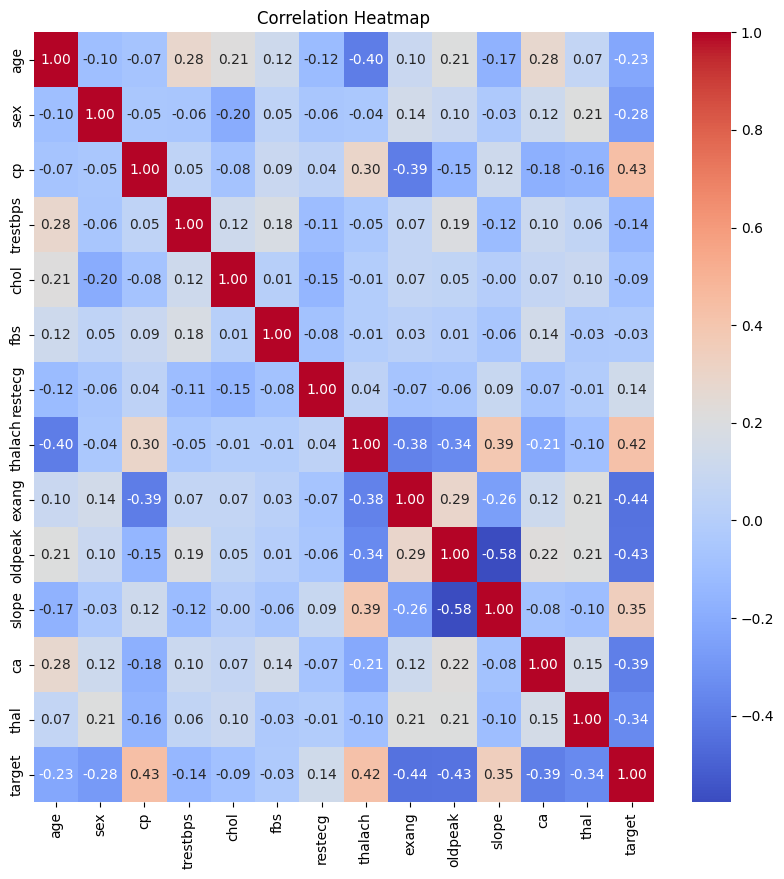

In [56]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png")
plt.show()

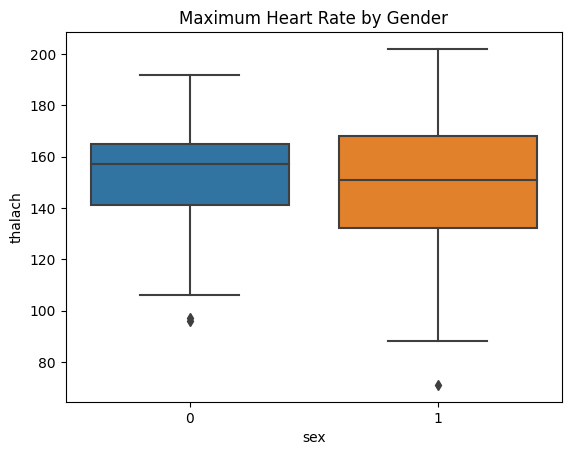

In [57]:
sns.boxplot(x='sex', y='thalach', data=df)
plt.title('Maximum Heart Rate by Gender')
plt.savefig("Maximum Heart Rate by Gender.png")
plt.show()


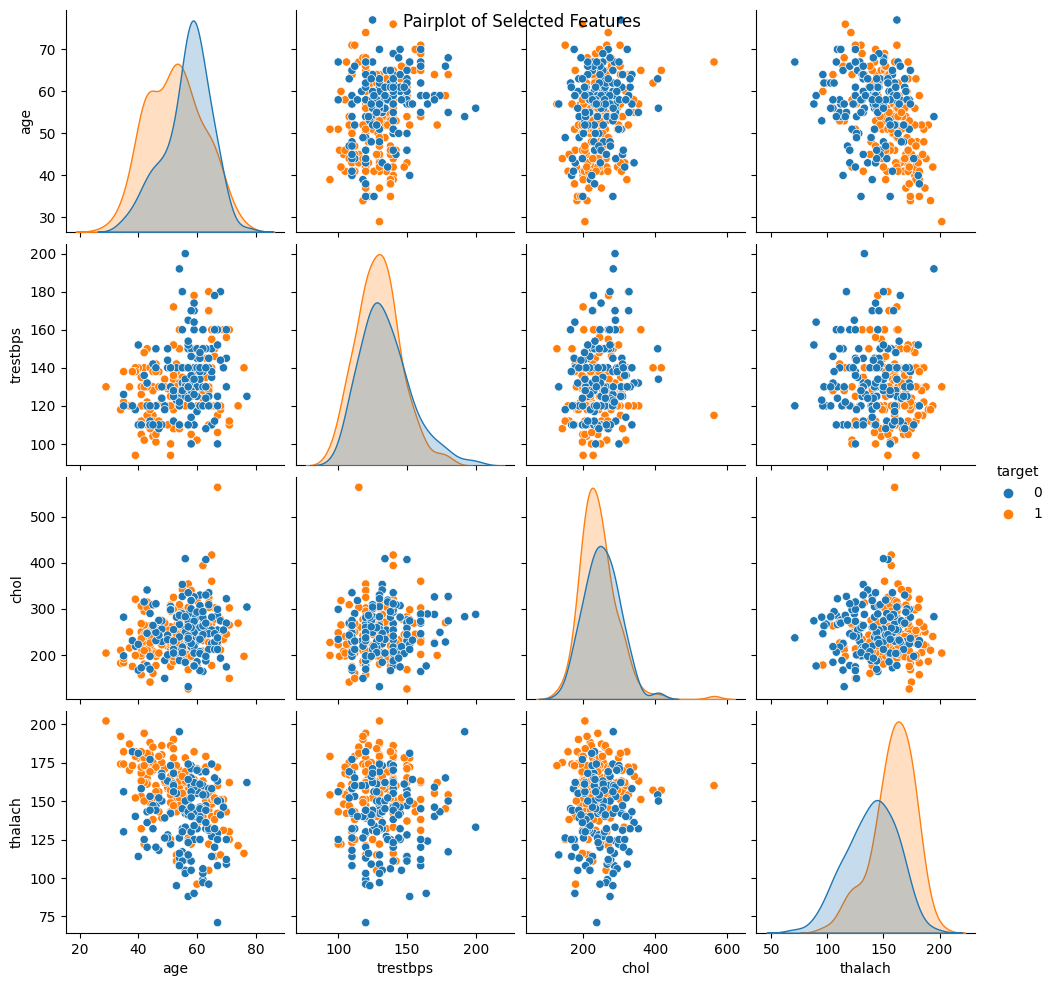

In [58]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')
plt.suptitle('Pairplot of Selected Features')
plt.savefig("Pairplot of Selected Features.png")
plt.show()

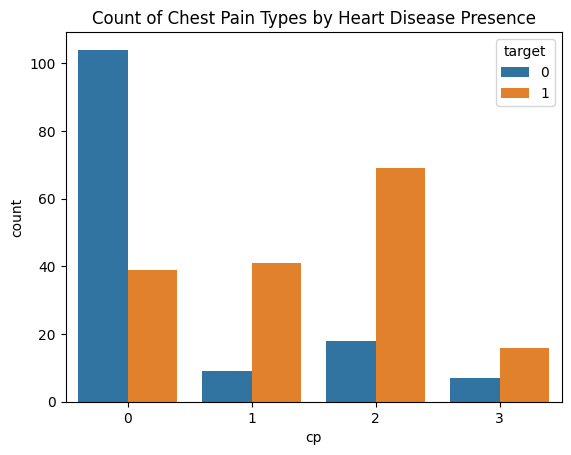

In [59]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Count of Chest Pain Types by Heart Disease Presence')
plt.savefig("Count of Chest Pain Types by Heart Disease Presence.png")
plt.show()

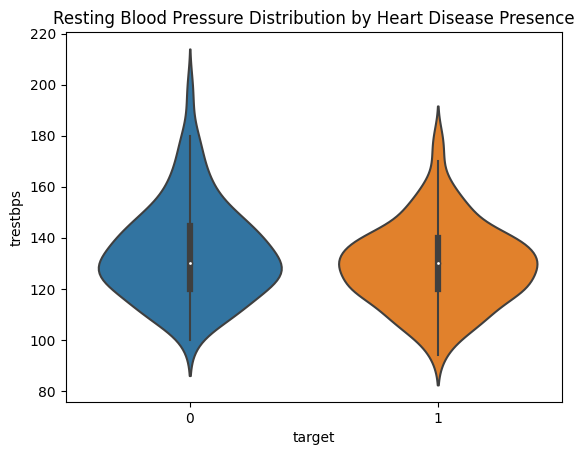

In [60]:
sns.violinplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure Distribution by Heart Disease Presence')
plt.savefig("Violin Plot.png")
plt.show()

## Models

In [25]:
## Importing functions
import import_ipynb
from function import read_data,data_prep,log_model,decision_tree,rf_classifier,kn_classifier,svm_model,naive_bayes_model,model_diag

In [26]:
df = read_data()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X_train,X_test,y_train,y_test = data_prep(df, 0.33)

## Logistic Regression Model

In [28]:
pred = log_model(X_train,y_train,X_test)
pred

C:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [30]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 79.0 %
Precision score = 84.0 %
classification Report
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        36
           1       0.84      0.83      0.83        64

    accuracy                           0.79       100
   macro avg       0.77      0.78      0.77       100
weighted avg       0.79      0.79      0.79       100

Confusion Matrix
[[26 10]
 [11 53]]
Root Mean Squared Error (RMSE) = 0.46


## Decision Tree Model

In [31]:
pred = decision_tree(X_train,y_train,X_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [32]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 84.0 %
Precision score = 82.0 %
classification Report
              precision    recall  f1-score   support

           0       0.88      0.64      0.74        36
           1       0.82      0.95      0.88        64

    accuracy                           0.84       100
   macro avg       0.85      0.80      0.81       100
weighted avg       0.85      0.84      0.83       100

Confusion Matrix
[[23 13]
 [ 3 61]]
Root Mean Squared Error (RMSE) = 0.4


## Random Forest Model

In [51]:
pred = rf_classifier(X_train,y_train,X_test)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [52]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 81.0 %
Precision score = 83.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        36
           1       0.83      0.89      0.86        64

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100

Confusion Matrix
[[24 12]
 [ 7 57]]
Root Mean Squared Error (RMSE) = 0.44


## KNeighborsClassifier Model

In [47]:
pred = kn_classifier(X_train,y_train,X_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [48]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 71.0 %
Precision score = 83.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.75      0.65        36
           1       0.83      0.69      0.75        64

    accuracy                           0.71       100
   macro avg       0.70      0.72      0.70       100
weighted avg       0.74      0.71      0.72       100

Confusion Matrix
[[27  9]
 [20 44]]
Root Mean Squared Error (RMSE) = 0.54


## Support Vector Machine(SVM)

In [49]:
pred = svm_model(X_train,y_train,X_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [50]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 81.0 %
Precision score = 83.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.67      0.72        36
           1       0.83      0.89      0.86        64

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100

Confusion Matrix
[[24 12]
 [ 7 57]]
Root Mean Squared Error (RMSE) = 0.44


## Naive Bayes Model

In [44]:
pred = naive_bayes_model(X_train,y_train,X_test)
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [45]:
### Model Diagnostics
acc, prc,clf,conf, rmse = model_diag(y_test,pred)
print("Accuracy score =", (round(acc,2)*100),"%")
print("Precision score =", (round(prc,2)*100),"%")
print("Classification Report")
print(clf)
print("Confusion Matrix")
print(conf)
print("Root Mean Squared Error (RMSE) =",round(rmse,2))

Accuracy score = 85.0 %
Precision score = 88.0 %
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        36
           1       0.88      0.89      0.88        64

    accuracy                           0.85       100
   macro avg       0.84      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100

Confusion Matrix
[[28  8]
 [ 7 57]]
Root Mean Squared Error (RMSE) = 0.39
